* Education        
 - 'Below College'                     
 - 'College'                             
 - 'Bachelor'
 - 'Master'
 - 'Doctor'
* EnvironmentSatisfaction
 - 'Low'
 - 'Medium'
 - 'High'
 - 'Very High'
* JobInvolvement  
 - 'Low'
 - 'Medium'
 - 'High'
 - 'Very High'
* JobSatisfaction  
 - 'Low'
 - 'Medium'
 - 'High'
 - 'Very High'
 * PerformanceRating  
 - 'Low'
 - 'Good'
 - 'Excellent'
 - 'Outstanding'
* RelationshipSatisfaction  
 - 'Low'
 - 'Medium'
 - 'High'
 - 'Very High'
* WorkLifeBalance  
 - 'Bad'
 - 'Good'
 - 'Better'
 - 'Best'
* RemoteWork
  - ‘on-site work’
  - ‘full remote’
* Incentive : rewards for performance


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/comp/comp3/company_i

/content/drive/MyDrive/comp/comp3/company_i


In [3]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 775.1 kB/s eta 0:00:00


In [12]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from category_encoders import TargetEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor as lgbmregressor
from xgboost import XGBClassifier
import japanize_matplotlib as plt
%matplotlib inline

# 小数第３位まで表示
%precision 3

ModuleNotFoundError: No module named 'japanize_matplotlib'

In [5]:
# セルの横幅を広げる
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
data = pd.read_csv('data.csv')

In [7]:
data = data.drop(['Over18',"StandardHours","EmployeeCount"], axis=1)

In [8]:
data.replace('No',0, inplace=True)
data.replace('Yes',1, inplace=True)
data.replace('Male',0, inplace=True)
data.replace('Female',1, inplace=True)

le = LabelEncoder()

encode_columns= ['BusinessTravel','Department','EducationField','MaritalStatus','HowToEmploy']
for column in encode_columns:
  data[column] = le.fit_transform(data[column])

data.replace('Sales Executive',0,inplace=True)
data.replace('Research Scientist',1,inplace=True)
data.replace('Laboratory Technician',2,inplace=True)
data.replace('Manufacturing Director',3,inplace=True)
data.replace('Healthcare Representative',4,inplace=True)
data.replace('Manager',5,inplace=True)
data.replace('Sales Representative',6,inplace=True)
data.replace('Research Director',7,inplace=True)
data.replace('Human Resources',8,inplace=True)

In [9]:
from sklearn.model_selection import train_test_split

target = data['OverTime']
explain = data.drop(['OverTime'], axis=1)

trainx, testx, trainy, testy = train_test_split(explain, target, test_size=0.2, random_state=1)


In [10]:
rf = LGBMClassifier(importance_type='gain')
rf.fit(trainx, trainy)

print(rf.score(testx, testy))
importance = rf.feature_importances_

[LightGBM] [Info] Number of positive: 321, number of negative: 855
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1659
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.272959 -> initscore=-0.979660
[LightGBM] [Info] Start training from score -0.979660
0.673469387755102


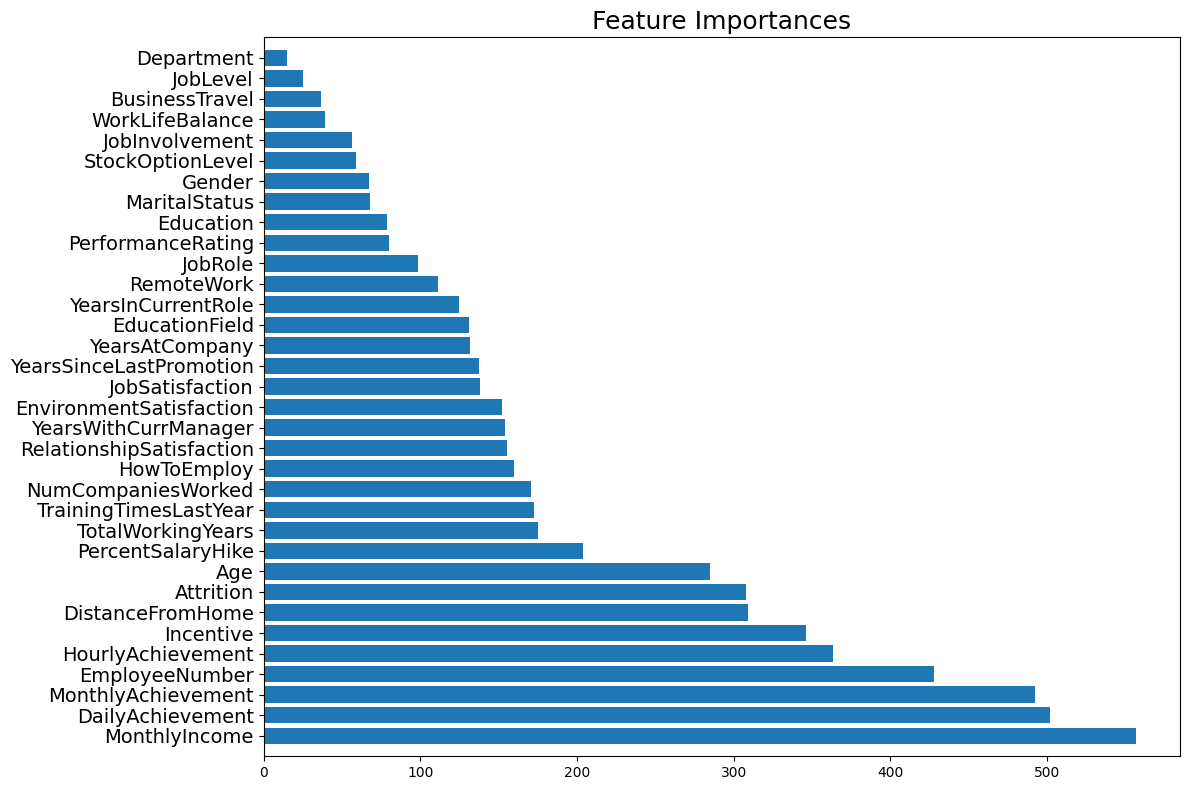

In [11]:
import matplotlib.pyplot as plt

# Assuming 'importance' is already calculated as rf.feature_importances_
feature_names = trainx.columns  # Replace with the actual feature names

# Sort feature importances and names in descending order
sorted_indices = np.argsort(importance)[::-1]
importance = importance[sorted_indices]
feature_names = feature_names[sorted_indices]

plt.figure(figsize=(12, 8))  # Increase figure size
plt.title("Feature Importances", fontsize=18)  # Increase title font size
plt.barh(range(trainx.shape[1]), importance, align='center')
plt.yticks(range(trainx.shape[1]), feature_names, fontsize=14)  # Increase y-tick font size
plt.ylim([-1, trainx.shape[1]])
plt.tight_layout()
plt.show()